# 데이터 불러오기


In [ ]:
# 현재 폴더 확인
%pwd

'/content'

In [ ]:
# 내 구글드라이브와 코랩 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 분석진행중 폴더로 이동
%cd /content/drive/Shareddrives/세번째_으싸으싸팀/분석진행중

/content/drive/Shareddrives/세번째_으싸으싸팀/분석진행중


In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import koreanize_matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 고객 분석
- 원본데이터인 2019-Oct.csv를 parquet으로 바꾼 데이터셋( 2019-Oct.parquet.gzip)을 이용했습니다

In [ ]:
df = pd.read_parquet('/content/drive/Shareddrives/세번째_으싸으싸팀/분석진행중/data/박민정/2019-Oct.parquet.gzip')

In [ ]:
df.shape

(42448764, 9)

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


## 10월 한달동안 고객들의 행동유형

In [ ]:
df['event_type'].value_counts()

view        40779399
cart          926516
purchase      742849
Name: event_type, dtype: int64

In [ ]:
labels = df['event_type'].value_counts().index.tolist()
ratio = df['event_type'].value_counts().values.tolist()

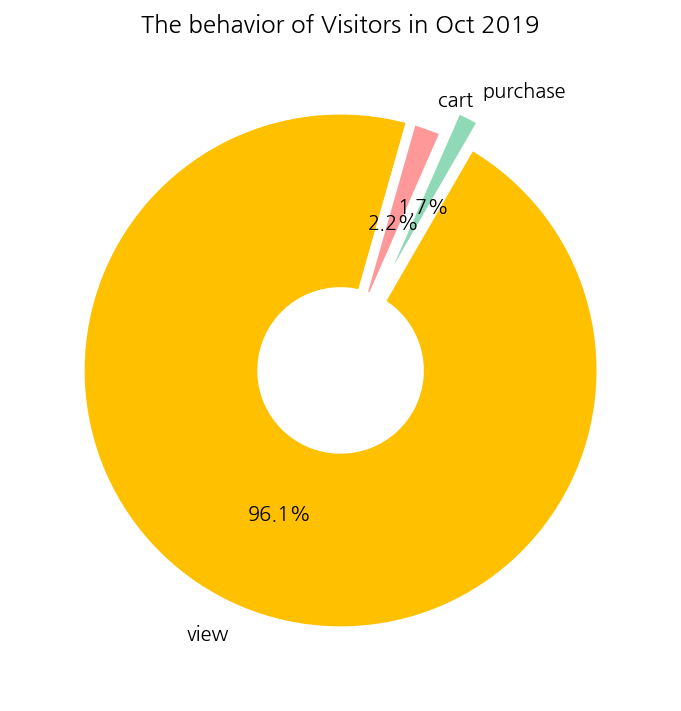

In [ ]:
#색상 선택
cmap = plt.get_cmap("Set3")
colors = ['#ffc000', '#ff9999', '#8fd9b6']
#width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':5} 

plt.figure(figsize=(6,6))
plt.pie(ratio, 
        labels=labels,
        autopct='%.1f%%',
        startangle=60, # 축이 시작되는 각도 설정
        counterclock=False, 
        explode=[0,0,0.1], # 중심에서 벗어나는 정도 표시
        colors= colors,
        wedgeprops = wedgeprops)
plt.title('The behavior of Visitors in Oct 2019');

## 10월 한달동안 얼마나 많은 고객들이 사이트를 방문했을까?

In [ ]:
visitor = df['user_id'].nunique()
print(f'Website visitors : {visitor:,}')

Website visitors : 3,022,290


## 10월 한달간 고객 방문자수 추이

In [ ]:
"# event별 날짜만 따로 추출하는 함수
def find_date(event_time):
    event_time = datetime.strptime(event_time[0:10],'%Y-%m-%d').date()
    return event_time

In [ ]:
datetime.strptime(df['event_time'][0][0:10],'%Y-%m-%d').date()

datetime.date(2019, 10, 1)

In [ ]:
df['event_date'] = df['event_time'].apply(lambda x: find_date(x))

In [ ]:
df_date = df[['event_date','user_id']].drop_duplicates()

In [ ]:
# 램 다운될까봐 df_date를 parquet파일로 저장해놓기
df_date.to_parquet('/content/drive/Shareddrives/세번째_으싸으싸팀/분석진행중/data/박민정/10월_날짜별_방문자.parquet.gzip', compression='gzip')

In [ ]:
#램 다운되서 다시 실행
df_date = pd.read_parquet('/content/drive/Shareddrives/세번째_으싸으싸팀/분석진행중/data/박민정/10월_날짜별_방문자.parquet.gzip')

In [ ]:
visitors_date = df_date.groupby(['event_date']).agg({'user_id' : 'count'}
                                                    ).sort_values(by=['event_date'], ascending=True)
visitors_date = visitors_date.reset_index() # 인덱스를 컬럼으로 바꿔주기
visitors_date

,event_date,user_id
0,2019-10-01,190188
1,2019-10-02,184965
2,2019-10-03,170668
3,2019-10-04,209410
4,2019-10-05,194958
5,2019-10-06,193210
6,2019-10-07,186951
7,2019-10-08,221204
8,2019-10-09,214140
9,2019-10-10,205321


Text(0.5, 0, '방문자 수')

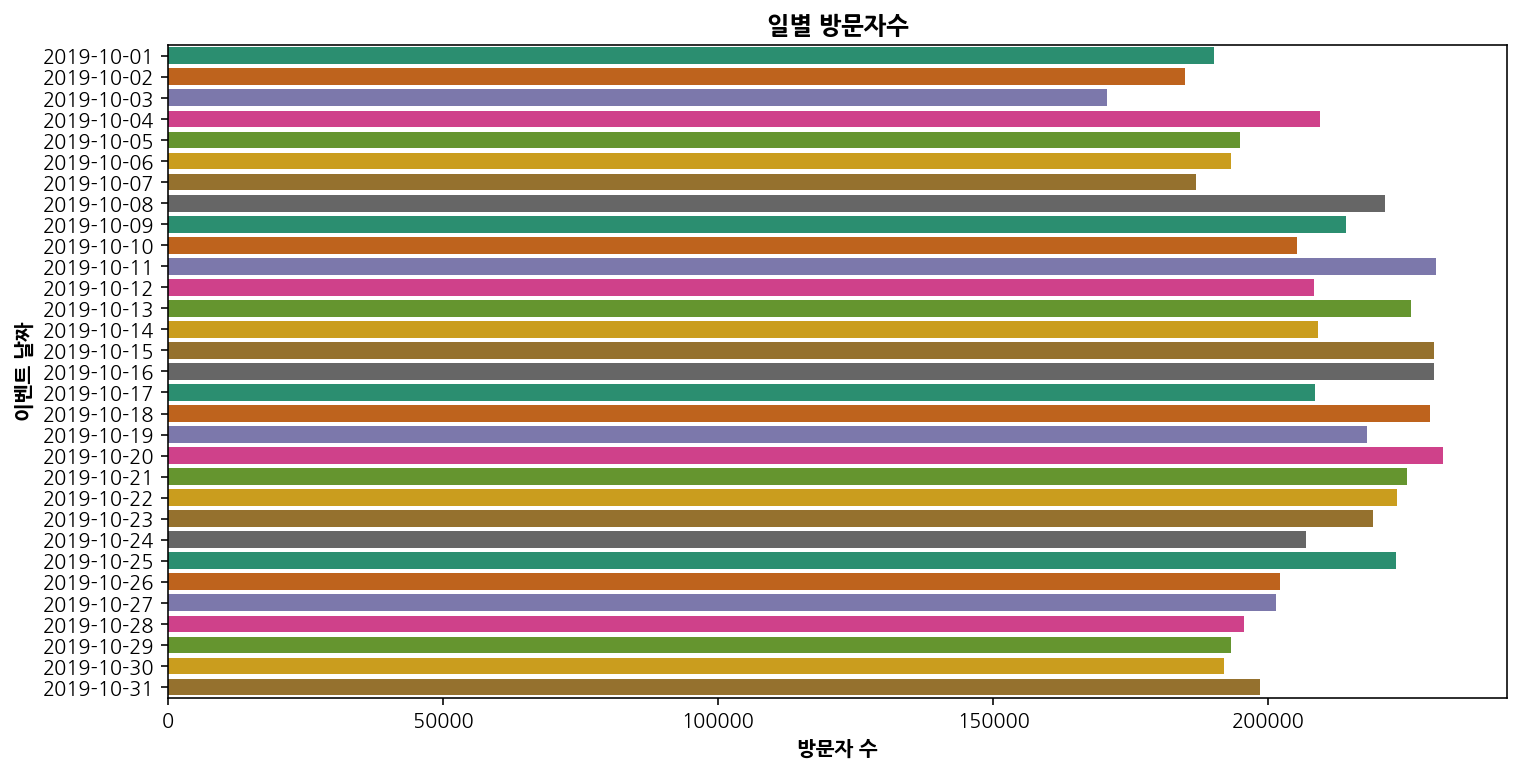

In [ ]:
ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(y= 'event_date' , x = 'user_id',data = visitors_date , orient = 'h' , palette = 'Dark2')
ax.set_title("일별 방문자수", fontweight = 'bold')
ax.set_ylabel('이벤트 날짜', fontweight = 'bold')
ax.set_xlabel('방문자 수', fontweight = 'bold')

Text(0.5, 0, '이벤트 날짜')

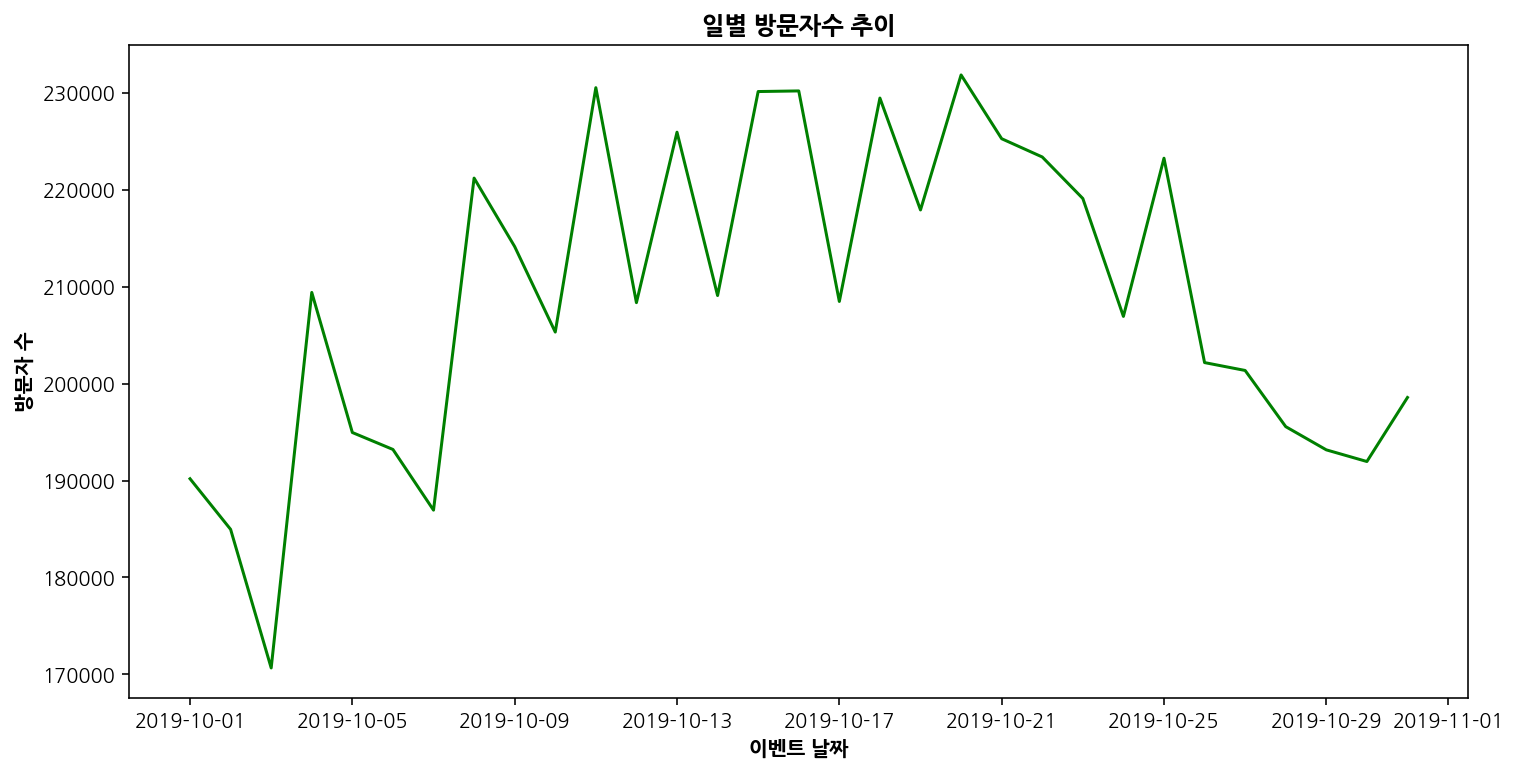

In [ ]:
ax = plt.subplots(figsize=(12, 6))
ax = sns.lineplot(x= 'event_date' , y = 'user_id',data=visitors_date , color = 'g')
ax.set_title("일별 방문자수 추이" , fontweight = 'bold')
ax.set_ylabel('방문자 수', fontweight = 'bold')
ax.set_xlabel('이벤트 날짜', fontweight = 'bold')

In [ ]:
# 방문자 수 기준 상위 top10
visitors_date.nlargest(10 , 'user_id')

,event_date,user_id
19,2019-10-20,231849
10,2019-10-11,230533
15,2019-10-16,230199
14,2019-10-15,230135
17,2019-10-18,229463
12,2019-10-13,225942
20,2019-10-21,225269
21,2019-10-22,223384
24,2019-10-25,223258
7,2019-10-08,221204


In [ ]:
# 방문자 수 기준 하위 top10
visitors_date.nsmallest(10 , 'user_id')

,event_date,user_id
2,2019-10-03,170668
1,2019-10-02,184965
6,2019-10-07,186951
0,2019-10-01,190188
29,2019-10-30,191965
28,2019-10-29,193168
5,2019-10-06,193210
4,2019-10-05,194958
27,2019-10-28,195563
30,2019-10-31,198571


## 상품분석

### 어떤 아이템 카테고리를 가장 많이 봤을까?
- purchase로 하지 않고 view로 한 이유
1. 고객들의 전반적인 관심정도를 파악해보기 위해
2. 많이 봤다는 건 그만큼 많은 사람들이 관심을 보인다는 뜻
3. purchase로 하면 너무 분석 데이터 수가 작아짐
4. 관심이 있다고 해서 구매로 바로 이어지지 않는 경우도 존재  
ex) 사고싶지만 돈이 없는경우...


In [ ]:
df_view = df.loc[df['event_type'] == 'view']

In [ ]:
df_view['category_code'].value_counts()

electronics.smartphone          10619448
electronics.clocks               1272783
computers.notebook               1106406
electronics.video.tv             1055961
electronics.audio.headphone      1018542
                                  ...   
construction.tools.soldering         631
apparel.shorts                       630
apparel.jacket                       435
auto.accessories.anti_freeze         308
country_yard.furniture.bench         190
Name: category_code, Length: 126, dtype: int64

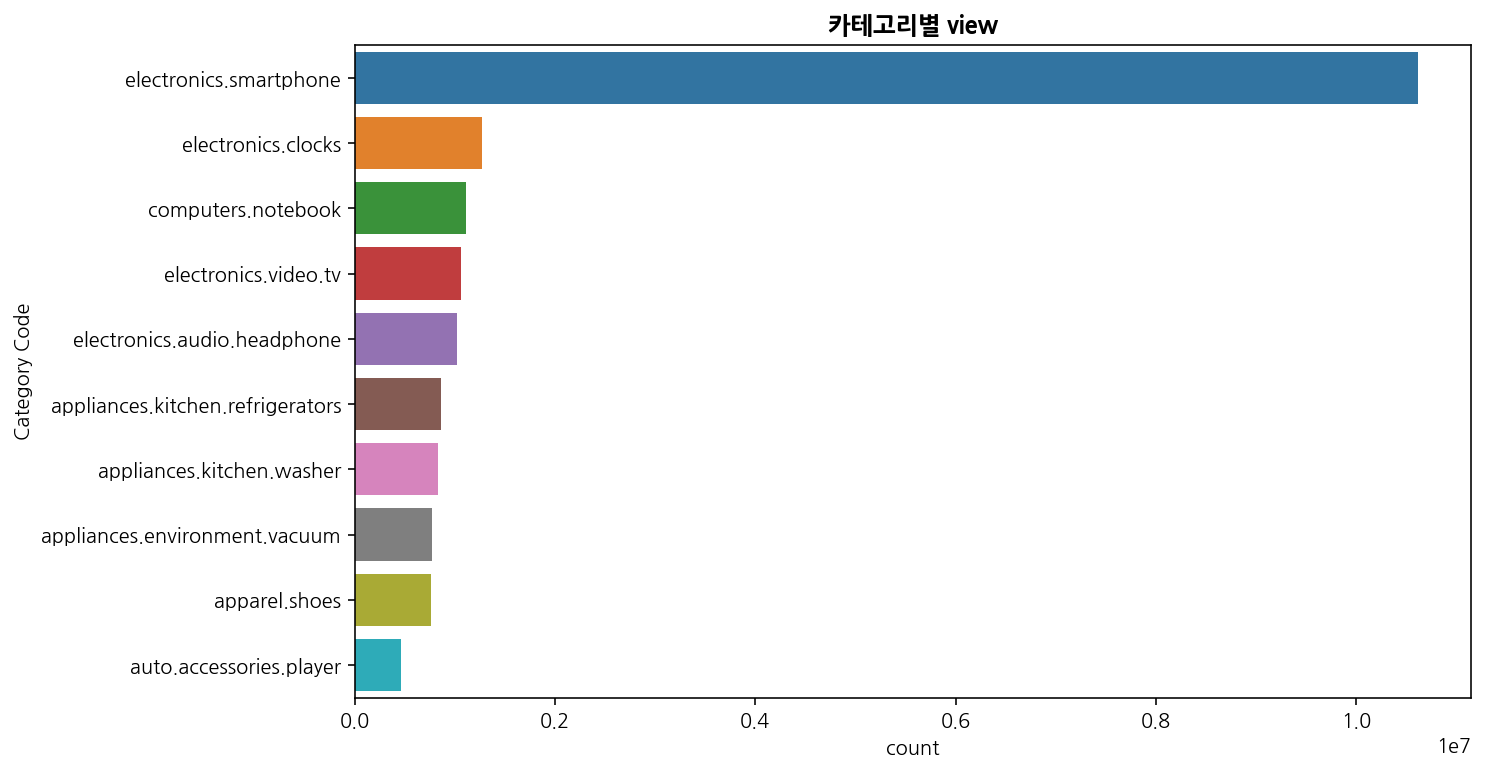

In [ ]:
# 상위 10개 카테고리만 남겨 df_top으로 생성
top_category=df_view['category_code'].value_counts().nlargest(10).index
df_top=df_view[df_view['category_code'].isin(top_category)]

plt.figure(figsize=(10,6))
box=sns.countplot(y='category_code', data= df_top, order = top_category)
box.set_title("카테고리별 view" , fontweight = 'bold')
box.set_ylabel("Category Code")
plt.show()

### 어떤 브랜드에 관심이 많을까?

In [ ]:
df_view['brand'].value_counts()

samsung        4806630
apple          3770597
xiaomi         2922650
huawei         1045572
lucente         644283
                ...   
t.bone               1
nicalis              1
bodykraft            1
drop                 1
skindoctors          1
Name: brand, Length: 3444, dtype: int64

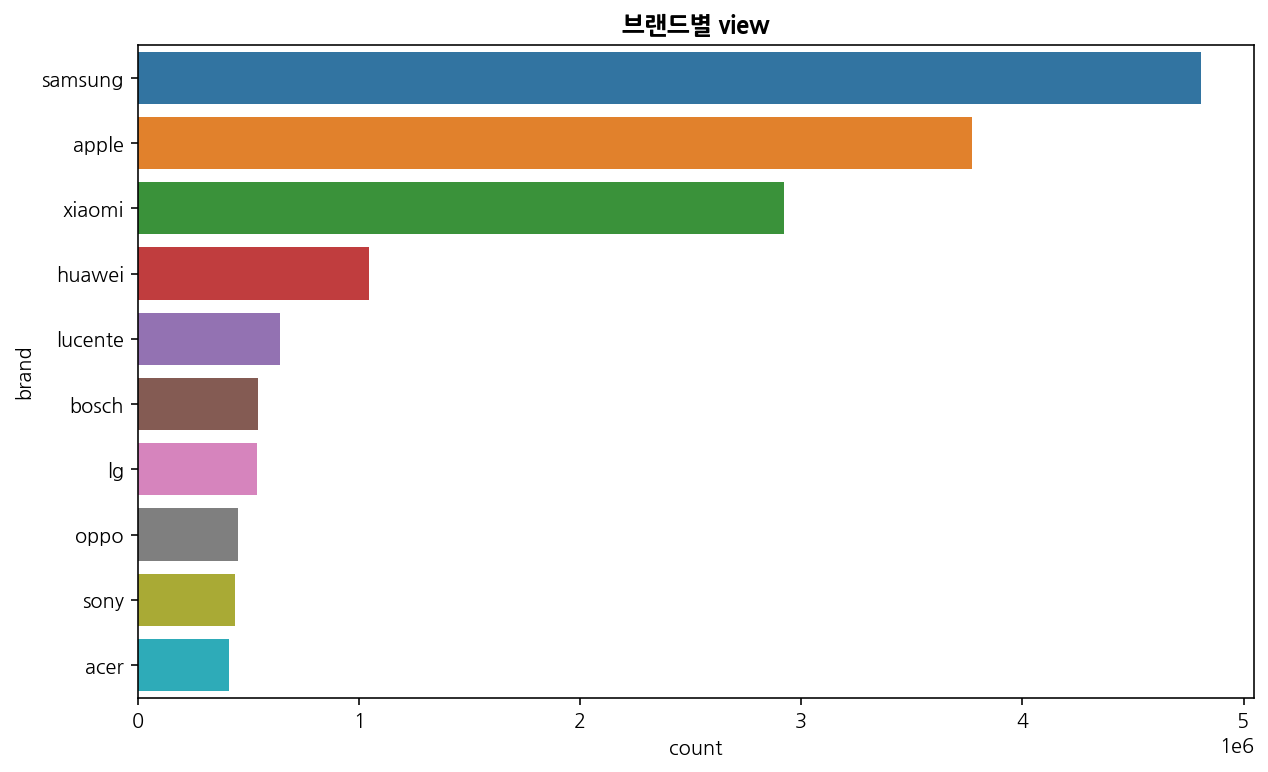

In [ ]:
top_brand=df_view['brand'].value_counts().nlargest(10).index
df_top=df_view[df_view['brand'].isin(top_brand)]

plt.figure(figsize=(10,6))
box=sns.countplot(y='brand', data= df_top, order = top_brand)
box.set_title("브랜드별 view" , fontweight = 'bold')
box.set_ylabel("brand")
plt.show()

### 어떤 브랜드가 제일 잘 팔렸을까?

- 수익과 직접적으로 연결되는 부분이기에 view가 아닌 purchase로 분류된 데이터프레임으로 분석 진행

In [ ]:
df_purchase = df.loc[df['event_type'] == 'purchase']

In [ ]:
# 램 다운될까봐 df_date를 parquet파일로 저장해놓기
df_purchase.to_parquet('/content/drive/Shareddrives/세번째_으싸으싸팀/분석진행중/data/박민정/df_purchase.parquet.gzip', compression='gzip')

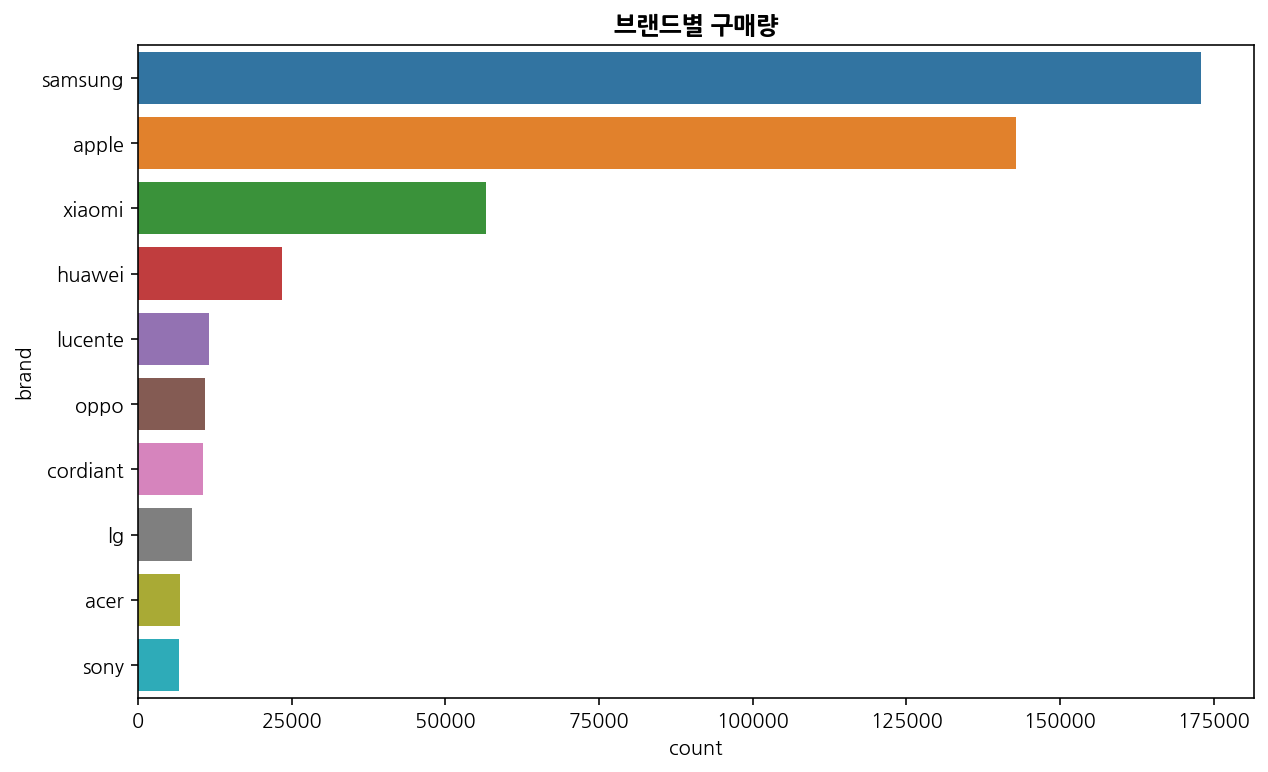

In [ ]:
# view랑 purchase랑 차이가 있나 한번 확인해보기
top_brand=df_purchase['brand'].value_counts().nlargest(10).index
df_top=df_purchase[df_purchase['brand'].isin(top_brand)]

plt.figure(figsize=(10,6))
box=sns.countplot(y='brand', data= df_top, order = top_brand)
box.set_title("브랜드별 구매량" , fontweight = 'bold')
box.set_ylabel("brand")
plt.show()

- 순위의 차이가 살짝 있음
- view에서는 top10에 bosch 브랜드가 들어갔지만 purchase에서는 top10에 cordiant브랜드가 들어감
- 둘다 자동차부품 회사인 거 같은데 왜 이런 차이가 날까?

- 체크: 가격대가 어느정도인가? cordiant 가격대가 bosch보다 조금 더 저렴한가?  
(흔히 비싼제품에 관심이 가서 클릭해보지만 결국 구매로 이어지지 못하니까..ㅎ)


## 가격대 분포

In [ ]:
df_purchase.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,None,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553


In [ ]:
# price가 없는 행들은 제거한 뒤에 분석 실시
df_purchase.dropna(subset=['price'])

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,None,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
...,...,...,...,...,...,...,...,...,...
42448148,2019-10-31 23:55:13 UTC,purchase,26402784,2053013563651392361,None,None,102.45,516604399,a98bd433-57ac-42d0-ba81-e18b135a7a16
42448173,2019-10-31 23:55:21 UTC,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c
42448271,2019-10-31 23:56:03 UTC,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b
42448362,2019-10-31 23:56:53 UTC,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

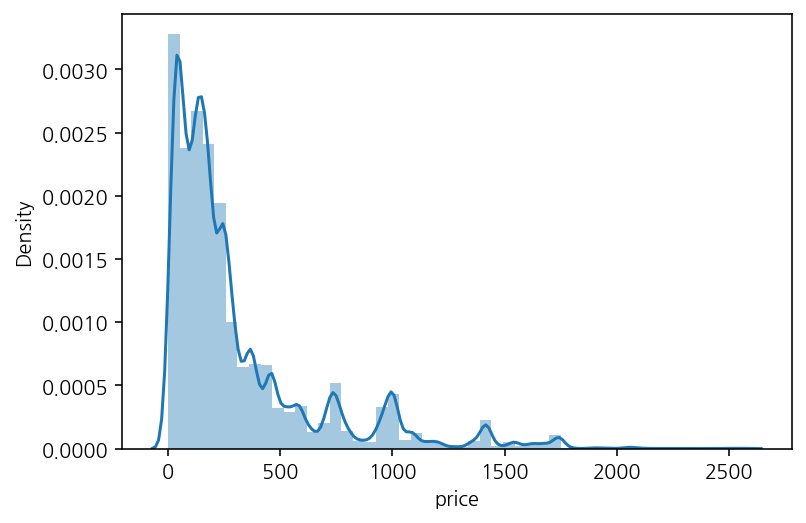

In [ ]:
sns.distplot(df_purchase['price'], kde = True)

In [ ]:
df_purchase['price'].describe()

count    742849.000000
mean        309.561569
std         348.873241
min           0.770000
25%          87.490000
50%         179.840000
75%         375.210000
max        2574.070000
Name: price, dtype: float64

- 중위수~ 평균 사이인 180~309에 구매를 많이 하므로 웹쇼핑몰에 새로운 물건을 들여올 때 선호하는 가격대와 비슷한 제품들 위주로 들여올 수 있지 않을까?

- 대충 이렇게 생각만 해놓고 분석 진행해보기